# Weather Forecast at Sydney


## About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)




This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## **Import the required libraries**


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import pylab as pl
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import math
import sklearn.tree as tree
import itertools
from sklearn import svm
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

### Data Import

In [3]:
df = pd.read_csv("Weather_Data.csv")

> Note: This version of the lab is designed for JupyterLite, which necessitates downloading the dataset to the interface. However, when working with the downloaded version of this notebook on your local machines (Jupyter Anaconda), you can simply **skip the steps above of "Importing the Dataset"** and use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [4]:
df.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing

First, we need to perform one hot encoding to convert categorical variables to binary variables.


In [6]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [7]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

C:\Users\dimsp\AppData\Local\Temp\ipykernel_12016\288546165.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)


In [8]:
df_sydney_processed.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,False,False,False,False,False,True,False,False,False,False
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,False,False,False,False,False,False,False,False,False,False
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,False,False,False,False,False,False,False,False,False,False
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,False,False,False,False,False,False,False,False,False,False
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,False,False,False,False,False,False,False,True,False,False


# Regression

## Humidity Prediction

## Multi-Linear Regression

### Data Split

Now, we set our 'features' or x values and our Y or target variable.


In [9]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [10]:
df_sydney_processed = df_sydney_processed.astype(float)

In [11]:
features1 = df_sydney_processed.drop(columns='Humidity3pm', axis=1)
X1 = features1
y1 = df_sydney_processed['Humidity3pm']

In [12]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=10, train_size = 0.8)

### Model Development

In [13]:
LinearReg =linear_model.LinearRegression()
LinearReg.fit(X1_train, y1_train)
LinearReg

LinearRegression()

### Predictions

In [14]:
predictions_linreg =LinearReg.predict(X1_test)
predictions_linreg[0:20]

array([34.45100403, 49.85456848, 67.17433167, 64.46607971, 25.42976379,
       67.81495667, 62.74360657, 53.05207825, 76.84632874, 49.43830872,
       58.18214417, 59.11201477, 64.82527161, 30.26057434, 60.36891174,
       68.34767151, 42.51875305, 62.85780334, 35.89009094, 50.4834137 ])

### Model Evaluation

In [15]:
LinearRegression_MAE = np.mean(np.absolute(predictions_linreg - y1_test))
LinearRegression_MSE = np.mean((predictions_linreg - y1_test) ** 2)
LinearRegression_RMSE = np.mean(math.sqrt(np.mean(predictions_linreg - y1_test) ** 2))
LinearRegression_VAR = LinearReg.score(X1,y1)
LinearRegression_R2 = r2_score(y1_test, predictions_linreg)

In [16]:
Linear_Regression_Report = {"MAE":LinearRegression_MAE,"MSE":LinearRegression_MSE,"RMSE":LinearRegression_RMSE,"VAR":LinearRegression_VAR,"R2":LinearRegression_R2}
Linear_Regression_Report_df=pd.DataFrame(Linear_Regression_Report.items(),columns=['Evaluation Method', 'Score'])
Linear_Regression_Report_df

,Evaluation Method,Score
0,MAE,5.245445
1,MSE,44.768004
2,RMSE,0.065056
3,VAR,0.834147
4,R2,0.845243


# Classification

## Rainy Day Prediction

### Data Split

In [17]:
features2 = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
X2 = features2
y2 = df_sydney_processed['RainTomorrow']

In [18]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=10, train_size = 0.8)

### KNN


### Model Accuracy Graph

C:\Users\dimsp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Δεν είναι δυνατή η εύρεση του καθορισμένου αρχείου από το σύστημα
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\dimsp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\dimsp\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dimsp\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\dimsp\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid,

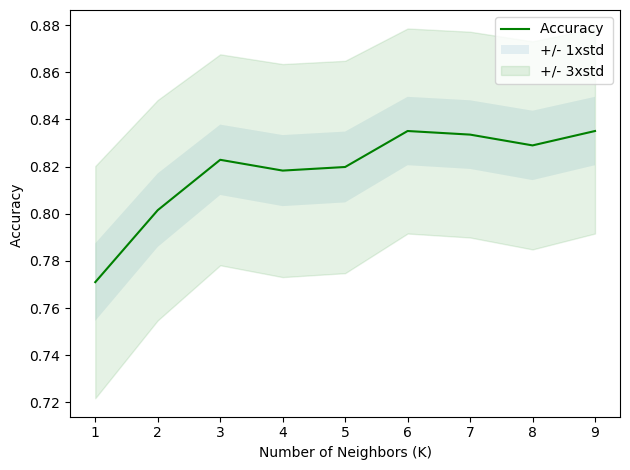

In [19]:
Ks=10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X2_train,y2_train)
    yhat=neigh.predict(X2_test)
    mean_acc[n-1] = metrics.accuracy_score(y2_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y2_test)/np.sqrt(yhat.shape[0])
    
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

### Model Development

In [20]:
k=6
KNN = KNeighborsClassifier(n_neighbors = k).fit(X2_train,y2_train)
KNN

KNeighborsClassifier(n_neighbors=6)

### Predictions

In [21]:
predictions_knn = KNN.predict(X2_test)
predictions_knn[0:20]

array([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

### Model Evaluation

In [22]:
KNN_Accuracy_Score = metrics.accuracy_score(y2_test, predictions_knn)
KNN_JaccardIndex = jaccard_score(y2_test, predictions_knn)
KNN_F1_Score = f1_score(y2_test, predictions_knn)
KNN_LogLoss = log_loss(y2_test, predictions_knn)

In [23]:
KNN_Report = {"Accuracy Score":KNN_Accuracy_Score,"Jaccard Index":KNN_JaccardIndex,"F1 Score":KNN_F1_Score,"Log-Loss":KNN_LogLoss}
KNN_df=pd.DataFrame(KNN_Report.items(),columns=['Evaluation Method', 'Score'])
KNN_df

,Evaluation Method,Score
0,Accuracy Score,0.835115
1,Jaccard Index,0.467980
2,F1 Score,0.637584
3,Log-Loss,5.943076


### Decision Tree


### Model Development

In [24]:
DecTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DecTree.fit(X2_train,y2_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Predictions

In [25]:
predictions_tree = DecTree.predict(X2_test)
predictions_tree[0:20]  

array([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0.])

### Model Evaluation

In [26]:
Tree_Accuracy_Score = metrics.accuracy_score(y2_test, predictions_tree)
Tree_JaccardIndex = jaccard_score(y2_test, predictions_tree)
Tree_F1_Score = f1_score(y2_test, predictions_tree)
Tree_LogLoss = log_loss(y2_test, predictions_tree)

In [27]:
Tree_Report = {"Accuracy Score":Tree_Accuracy_Score,"Jaccard Index":Tree_JaccardIndex,"F1 Score":Tree_F1_Score,"Log-Loss":Tree_LogLoss}
Tree_Report_df=pd.DataFrame(Tree_Report.items(),columns=['Evaluation Method', 'Score'])
Tree_Report_df

,Evaluation Method,Score
0,Accuracy Score,0.818321
1,Jaccard Index,0.480349
2,F1 Score,0.648968
3,Log-Loss,6.548389


### Logistic Regression


### Model Development 

In [28]:
LogR = LogisticRegression(C=0.01, solver='liblinear').fit(X2_train,y2_train)
LogR

LogisticRegression(C=0.01, solver='liblinear')

### Predictions

In [29]:
predictions_logreg = LogR.predict(X2_test)
predictions_logreg[0:20]

array([0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0.])

### Model Evaluation

In [30]:
LogR_Accuracy_Score = metrics.accuracy_score(y2_test, predictions_logreg)
LogR_JaccardIndex = jaccard_score(y2_test, predictions_logreg)
LogR_F1_Score = f1_score(y2_test, predictions_logreg)
LogR_LogLoss = log_loss(y2_test, predictions_logreg)

In [31]:
LogR_Report = {"Accuracy Score":LogR_Accuracy_Score,"Jaccard Index":LogR_JaccardIndex,"F1 Score":LogR_F1_Score,"Log-Loss":LogR_LogLoss}
LogR_Report_df=pd.DataFrame(LogR_Report.items(),columns=['Evaluation Method', 'Score'])
LogR_Report_df

,Evaluation Method,Score
0,Accuracy Score,0.842748
1,Jaccard Index,0.520930
2,F1 Score,0.685015
3,Log-Loss,5.667933


### SVM


### Model Development

In [32]:
SVM = svm.SVC(kernel='rbf')
SVM.fit(X2_train, y2_train)
SVM

SVC()

### Predictions

In [33]:
predictions_svm = SVM.predict(X2_test)
predictions_svm[0:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

### Model Evaluation

In [34]:
SVM_Accuracy_Score = metrics.accuracy_score(y2_test, predictions_svm)
SVM_JaccardIndex = jaccard_score(y2_test, predictions_svm)
SVM_F1_Score = f1_score(y2_test, predictions_svm)
SVM_LogLoss = log_loss(y2_test, predictions_svm)

In [35]:
SVM_Report = {"Accuracy Score":SVM_Accuracy_Score,"Jaccard Index":SVM_JaccardIndex,"F1 Score":SVM_F1_Score,"Log-Loss":SVM_LogLoss}
SVM_Report_df=pd.DataFrame(SVM_Report.items(),columns=['Evaluation Method', 'Score'])
SVM_Report_df 

,Evaluation Method,Score
0,Accuracy Score,0.719084
1,Jaccard Index,0.000000
2,F1 Score,0.000000
3,Log-Loss,10.125240


### Model Comparison

In [37]:
accuracy = [KNN_Accuracy_Score, Tree_Accuracy_Score, LogR_Accuracy_Score, SVM_Accuracy_Score]
accuracy = [100*i for i in accuracy]

jaccard = [KNN_JaccardIndex, Tree_JaccardIndex, LogR_JaccardIndex, SVM_JaccardIndex]
jaccard = [100*i for i in jaccard]

f1 = [KNN_F1_Score, Tree_F1_Score, LogR_F1_Score, SVM_F1_Score]
f1 = [100*i for i in f1]

logloss = [KNN_LogLoss, Tree_LogLoss, LogR_LogLoss, SVM_LogLoss]

method = ['K-Nearest Neighbour','Decision Tree','Logistic Regression','Support Vector Machine']
models = {'Classification Method':method, 'Accuracy Score (%)':accuracy, 'Jaccard Index (%)':jaccard, 'F1 Score (%)':f1, 'Log Loss Score':logloss}

Report_df = pd.DataFrame(models)
Report_df

,Classification Method,Accuracy Score (%),Jaccard Index (%),F1 Score (%),Log Loss Score
0,K-Nearest Neighbour,83.511450,46.798030,63.758389,5.943076
1,Decision Tree,81.832061,48.034934,64.896755,6.548389
2,Logistic Regression,84.274809,52.093023,68.501529,5.667933
3,Support Vector Machine,71.908397,0.000000,0.000000,10.125240
